In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import tensorflow as tf
import os

In [16]:
# Set the current working directory to the path where 'data' is located
os.chdir('/content/drive/MyDrive/Deep_Learning/ImageClassification')



In [20]:
os.listdir('data')

['happy', 'sad']

In [21]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [22]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
import cv2
import imghdr

In [24]:
data_dir = 'data'

In [25]:
os.listdir(data_dir)

['happy', 'sad']

In [31]:
os.listdir(os.path.join(data_dir,'happy'))

['image20.jpeg',
 'blog_image_20180219221810890.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'images33.jpg',
 'happy-person.jpeg',
 'iStock-1212931050.jpg',
 'image13.jpeg',
 'images27.jpg',
 'hdptcar-fi-2.jpg',
 'image7.jpeg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 'Happy_People_Happy_Man.jpg',
 'images31.jpg',
 'happy-people.jpg',
 'Top-Secrets-of-How-to-be-Happy.jpg',
 'traitshappypeople.jpg',
 'How_Happy_Are_People_at_Work.jpg',
 'happypeople-1024x679.jpg',
 'images22.jpg',
 'happy-people-1024x768.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 'image8.jpeg',
 'image10.jpeg',
 'images9.jpg',
 'image9.jpeg',
 'happy-people-group-fb.jpg',
 'images17.jpg',
 'Happy-people-800x533.jpg',
 'images7.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'image11.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'GettyImages-565706549-949x534.jpg',
 'images32.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'image6.jpeg',
 'tmp_6mv7xy_5

In [32]:
image_exts= ['jpg','jpeg','bmp','png']

In [33]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

image20.jpeg
blog_image_20180219221810890.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
images33.jpg
happy-person.jpeg
iStock-1212931050.jpg
image13.jpeg
images27.jpg
hdptcar-fi-2.jpg
image7.jpeg
How-to-Be-Happy_1200x628-facebook.jpg
Happy_People_Happy_Man.jpg
images31.jpg
happy-people.jpg
Top-Secrets-of-How-to-be-Happy.jpg
traitshappypeople.jpg
How_Happy_Are_People_at_Work.jpg
happypeople-1024x679.jpg
images22.jpg
happy-people-1024x768.jpeg
7-principles-of-successful-and-happy-people.png
image8.jpeg
image10.jpeg
images9.jpg
image9.jpeg
happy-people-group-fb.jpg
images17.jpg
Happy-people-800x533.jpg
images7.jpg
Screen-Shot-2012-10-23-at-12.57.22-PM.png
image11.jpeg
young-and-happy-people-vector-15114154.jpg
GettyImages-565706549-949x534.jpg
images32.jpg
HAPPY-PEOPLE-CLUB-LOGO.jpg
image6.jpeg
tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg
happy-people21.jpg
brady-bunch-3.jpg
images3.jpg
goup-happy-people-group-jumping-isolated-white-backgrou

In [34]:
import cv2

In [46]:
import imghdr

In [37]:
import matplotlib.pyplot as plt

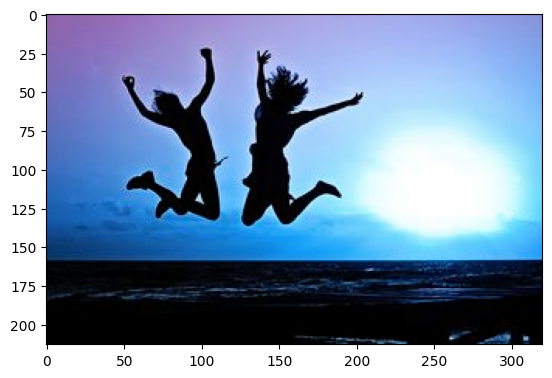

In [38]:
plt.imshow(img)

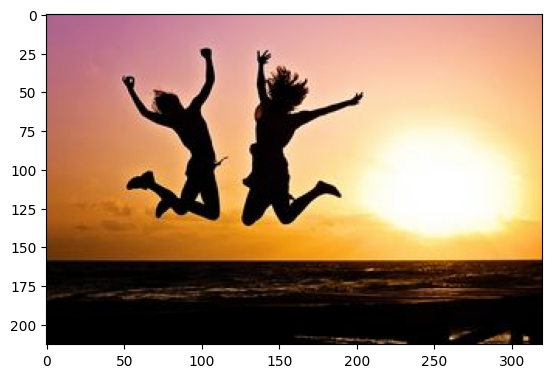

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image_exts

In [48]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
            os.remove(image_path)



In [ ]:
#Load Data

In [49]:
import numpy as np


In [94]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [65]:
data_iterator = data.as_numpy_iterator()

In [54]:
data_iterator

In [67]:
batch = data_iterator.next()

In [57]:
len(batch)

2

In [59]:
batch[0].shape

(32, 256, 256, 3)

In [60]:
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

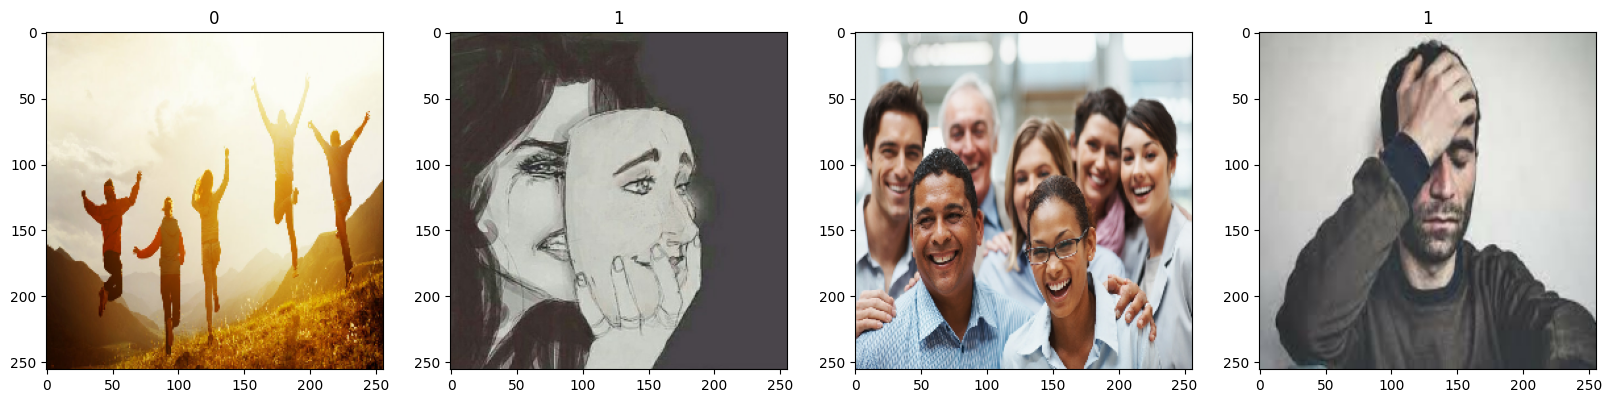

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

plt.show()


In [ ]:
# 0 = HAPPY
# 1 = SAD

In [69]:
batch[0].shape

(32, 256, 256, 3)

In [72]:
batch[0].max()

255.0

In [73]:
batch[0].min()

0.0

In [75]:
scaled = batch[0]/255

In [76]:
scaled.max()

1.0

In [96]:
data = data.map(lambda x,y:(x/255, y))

In [97]:
scaled_iterator = data.as_numpy_iterator()

In [98]:
batch = scaled_iterator.next()

In [99]:
batch[0].min()

0.0

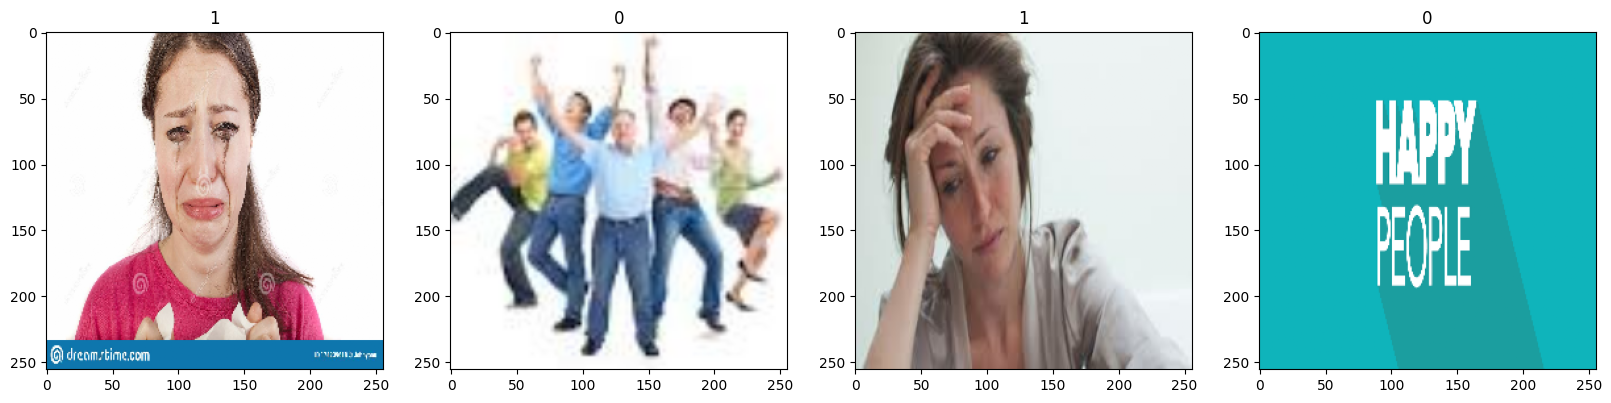

In [100]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].set_title(batch[1][idx])

plt.show()

In [101]:
len(data)

10

In [110]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [111]:
train_size

7

In [112]:
val_size

2

In [113]:
test_size

1

In [114]:
train_size + val_size + test_size

10

In [115]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [116]:
# Building DL Model

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [124]:
model = Sequential()

In [125]:
model.add(Conv2D(16,(3,3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 16)       

In [127]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [129]:
logdir = 'logs'
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
hist = model.fit(train, epochs =20, validation_data = val, callbacks= [tensorboard_callbacks])

Epoch 1/20
7/7 [==============================] - 14s 694ms/step - loss: 0.8251 - accuracy: 0.5357 - val_loss: 0.6397 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 9s 642ms/step - loss: 0.6624 - accuracy: 0.6071 - val_loss: 0.6145 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 9s 954ms/step - loss: 0.5650 - accuracy: 0.7902 - val_loss: 0.4423 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 6s 591ms/step - loss: 0.6129 - accuracy: 0.7277 - val_loss: 0.4468 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 8s 611ms/step - loss: 0.4575 - accuracy: 0.8393 - val_loss: 0.4583 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 9s 922ms/step - loss: 0.4098 - accuracy: 0.8482 - val_loss: 0.3262 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 9s 922ms/step - loss: 0.3355 - accuracy: 0.8750 - val_loss: 0.4228 - val_accuracy: 0.8281
Epoch 8/20
7/7 [===

In [131]:
hist.history

{'loss': [0.8251463770866394,
  0.6624199748039246,
  0.5649663805961609,
  0.612907886505127,
  0.45750826597213745,
  0.4098486304283142,
  0.3354642689228058,
  0.3227621614933014,
  0.25279930233955383,
  0.1820620596408844,
  0.1474151611328125,
  0.12421201914548874,
  0.09044458717107773,
  0.04733142629265785,
  0.028606323525309563,
  0.014340349473059177,
  0.017124760895967484,
  0.010215760208666325,
  0.01165221631526947,
  0.005798411089926958],
 'accuracy': [0.5357142686843872,
  0.6071428656578064,
  0.7901785969734192,
  0.7276785969734192,
  0.8392857313156128,
  0.8482142686843872,
  0.875,
  0.8616071343421936,
  0.9196428656578064,
  0.9508928656578064,
  0.9508928656578064,
  0.9642857313156128,
  0.9642857313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  1.0],
 'val_loss': [0.6396865248680115,
  0.6145012378692627,
  0.44231048226356506,
  0.4468096196651459,
  0.458314

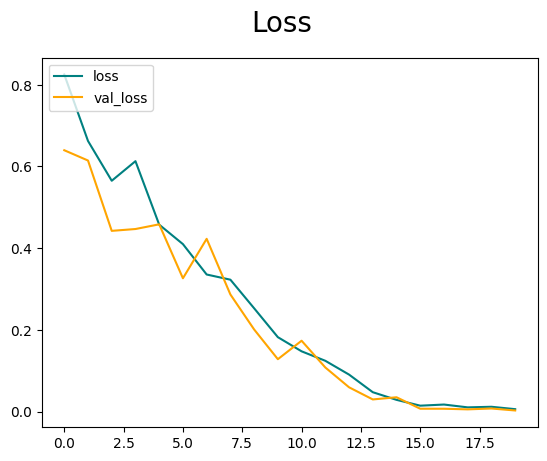

In [133]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [135]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [136]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [137]:
len(test)

1

In [140]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)


1/1 [==============================] - 0s 25ms/step


In [142]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {re.result().numpy()}')


Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [143]:
#TEST

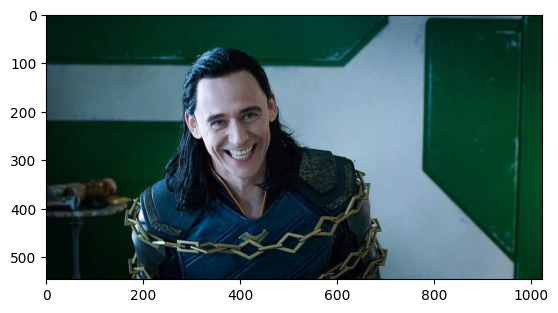

In [146]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

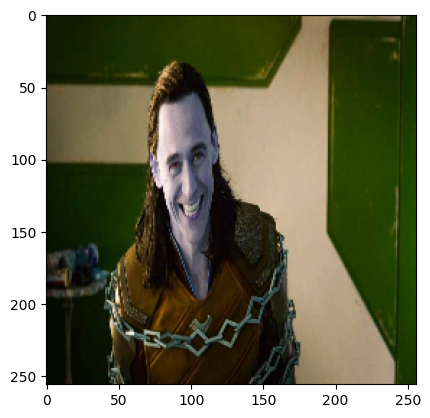

In [147]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [148]:
#test

In [151]:
yhat= model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 197ms/step


In [152]:
yhat

array([[0.96790487]], dtype=float32)

In [153]:
if yhat > 0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Happy


In [154]:
#Save

In [155]:
from tensorflow.keras.models import load_model

In [157]:
model.save(os.path.join('models','happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [158]:
#reload

In [160]:
new_model = os.path.join('models','happysadmodel.h5')

In [161]:
new_model

'models/happysadmodel.h5'

In [170]:
from tensorflow.keras.models import load_model

# Correct usage
model_path = 'models/happysadmodel.h5'
new_model = load_model(model_path)

# Assuming 'resize' is your image
input_data = np.expand_dims(resize / 255, 0)

# Now 'new_model' is a valid model object, and the 'predict' method can be used
yhatnew = new_model.predict(input_data)


1/1 [==============================] - 0s 79ms/step


In [171]:
if yhatnew > 0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Happy
